In [89]:
%matplotlib inline

In [91]:
#All needed libraries 
import pandas as pd
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [92]:
# Read  data from the data directory
df = pd.read_csv('Fashion_Recommendation_1.csv')

In [93]:
df.sample(5)

,Timestamp,Score,Gender,Age,Skin Color,What kind of clothes do you feel comfortable wearing?,Your Name,What color do you like to wear in Punjabi?,What color do you like to wear in Shirt?,What color do you like to wear in Saree?,What color do you like to wear in Kamiz?,Unnamed: 11,What color clothes do you like to wear?,Email Address,Occasion,Fabric
757,NaN,NaN,Female,12-22,Black,Saree,tanim,black,NaN,NaN,NaN,NaN,NaN,aharmanmd@gmail.com,special event,gorgeous
916,NaN,NaN,Female,12-22,Brown,Saree,Fatima,black,NaN,NaN,NaN,NaN,NaN,aharmanmd@gmail.com,special event,gorgeous
279,NaN,NaN,Female,41-55,Black,Salwar Kamiz,Fairuj,green,NaN,NaN,NaN,NaN,NaN,aharmanmd@gmail.com,everyday wear,cotton
861,NaN,NaN,Male,55+,Black,Shirt,sunbir,gray,NaN,NaN,NaN,NaN,NaN,aharmanmd@gmail.com,everyday wear,cotton
243,NaN,NaN,Female,55+,Bright,Salwar Kamiz,Fahmida Tithy,black,NaN,NaN,NaN,NaN,NaN,aharmanmd@gmail.com,everyday wear,cotton


#### Data Preprocessing:

In [94]:
#Rename columns and remove unnecessary columns
df.rename(columns={'Timestamp': 'Timestamp', 
                   'Score': 'Score', 
                   'Gender': 'Gender', 
                   'Age': 'Age', 
                   'Skin Color': 'Skin Color',
                   'What kind of clothes do you feel comfortable wearing?': 'Comfortable Clothes', 
                   'Your Name': 'Name', 
                   'What color do you like to wear in Punjabi?': 'Punjabi Color',
                   'What color do you like to wear in Shirt?': 'Shirt Color', 
                   'What color do you like to wear in Saree?': 'Saree Color',
                   'What color do you like to wear in Kamiz?': 'Kamiz Color', 
                   'Unnamed: 11': 'Unused',
                   'What color clothes do you like to wear?': 'Other Preferred Color', 
                   'Email Address': 'Email Address'}, inplace=True)

df.drop(columns=['Unused','Timestamp','Email Address','Score','Name'], inplace=True)

In [95]:
#Remove bangla characters
df = df.apply(lambda x: x.str.split('(', expand=True)[0] if x.dtype == "object" else x)

In [96]:
df.columns

Index(['Gender', 'Age', 'Skin Color', 'Comfortable Clothes', 'Punjabi Color',
       'Shirt Color', 'Saree Color', 'Kamiz Color', 'Other Preferred Color',
       'Occasion', 'Fabric'],
      dtype='object')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 999 non-null    object
 1   Age                    999 non-null    object
 2   Skin Color             999 non-null    object
 3   Comfortable Clothes    999 non-null    object
 4   Punjabi Color          953 non-null    object
 5   Shirt Color            16 non-null     object
 6   Saree Color            9 non-null      object
 7   Kamiz Color            11 non-null     object
 8   Other Preferred Color  4 non-null      object
 9   Occasion               999 non-null    object
 10  Fabric                 999 non-null    object
dtypes: object(11)
memory usage: 86.0+ KB


In [98]:
# Filter the DataFrame to remove rows where 'Comfortable Clothes' count is less than 5
df = df[df.groupby('Comfortable Clothes')['Comfortable Clothes'].transform('count') >= 5]


In [99]:
#Handel missing value 'Gender' column
df['Gender'] = df['Gender'].str.strip()
df['Gender'].fillna('Female',inplace=True)
df['Gender'].value_counts()


C:\Users\bappasaha\AppData\Local\Temp\ipykernel_11508\352822309.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna('Female',inplace=True)


Gender
Male      525
Female    465
Name: count, dtype: int64

In [100]:
# Replace values in the 'Age' column
df['Age'].replace({'12-22': '12-23'}, inplace=True)


C:\Users\bappasaha\AppData\Local\Temp\ipykernel_11508\3857551778.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].replace({'12-22': '12-23'}, inplace=True)


In [101]:
# Define gender-specific color preferences
male_colors = {'Panjabi': ['Gray', 'Blue', 'White'], 'Shirt': ['Black', 'Blue', 'White']}
female_colors = {'Saree': ['White', 'Blue', 'Black'], 'Kamiz': ['Green', 'Red', 'Black']}

import random

# Define function to fill null values with random colors
def fill_null_color(row):
    colors = []
    if pd.isnull(row['Punjabi Color']):
        if row['Gender'] == 'Male' and row['Comfortable Clothes'] == 'Panjabi':
            colors.append(random.choice(['Gray', 'Blue', 'White']))
        else:
            colors.append('')
    else:
        colors.append(row['Punjabi Color'])
        
    if pd.isnull(row['Shirt Color']):
        if row['Gender'] == 'Male' and row['Comfortable Clothes'] == 'Shirt':
            colors.append(random.choice(['Black', 'Blue', 'White']))
        else:
            colors.append('')
    else:
        colors.append(row['Shirt Color']) 
        
    if pd.isnull(row['Saree Color']):
        if row['Gender'] == 'Female' and row['Comfortable Clothes'] == 'Saree':
            colors.append(random.choice(['White', 'Blue', 'Black']))
        else:
            colors.append('')
    else:
        colors.append(row['Saree Color'])
        
    if pd.isnull(row['Kamiz Color']):
        if row['Gender'] == 'Female' and row['Comfortable Clothes'] == 'Salwar Kamiz':
            colors.append(random.choice(['Green', 'Red', 'Black']))
        else:
            colors.append('')
    else:
        colors.append(row['Kamiz Color'])
    
    return pd.Series(colors, index=['Punjabi Color', 'Shirt Color', 'Saree Color', 'Kamiz Color'])


df[['Punjabi Color', 'Shirt Color', 'Saree Color', 'Kamiz Color']] = df.apply(fill_null_color, axis=1)


In [102]:
if 'Occasion' not in df.columns:
    df['Occasion'] = None  # or any default value you want to use for filling
if 'Fabric' not in df.columns:
    df['Fabric'] = None  # or any default value you want to use for filling
def fill_null_occasion(row):
    if pd.isnull(row['Occasion']):
        return random.choice(['Everyday Wear', 'Special Event'])
    else:
        return row['Occasion']

# Define function to fill null values for Fabric based on Occasion
def fill_null_fabric(row):
    if pd.isnull(row['Fabric']):
        if row['Occasion'] == 'Everyday Wear':
            return 'Cotton Types'
        elif row['Occasion'] == 'Special Event':
            return 'Gorgeous Types'
    else:
        return row['Fabric']

# Apply functions to fill the columns
df['Occasion'] = df.apply(fill_null_occasion, axis=1)
df['Fabric'] = df.apply(fill_null_fabric, axis=1)

In [103]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 5 to 998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 990 non-null    object
 1   Age                    990 non-null    object
 2   Skin Color             990 non-null    object
 3   Comfortable Clothes    990 non-null    object
 4   Punjabi Color          990 non-null    object
 5   Shirt Color            990 non-null    object
 6   Saree Color            990 non-null    object
 7   Kamiz Color            990 non-null    object
 8   Other Preferred Color  0 non-null      object
 9   Occasion               990 non-null    object
 10  Fabric                 990 non-null    object
dtypes: object(11)
memory usage: 92.8+ KB


#### Data Training and Testing:

In [104]:

X = df[['Gender', 'Age', 'Skin Color','Occasion','Fabric']]
y_clothes = df['Comfortable Clothes']
y_color = df[['Punjabi Color', 'Shirt Color', 'Saree Color', 'Kamiz Color', 'Other Preferred Color']]

X_train, X_test, y_clothes_train, y_clothes_test, y_color_train, y_color_test = train_test_split(X, y_clothes, y_color, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()

y_clothes_train_encoded = label_encoder.fit_transform(y_clothes_train)
y_clothes_test_encoded = label_encoder.transform(y_clothes_test)


encoder = ce.TargetEncoder(cols=['Gender', 'Age', 'Skin Color','Occasion','Fabric'])

X_train_encoded = encoder.fit_transform(X_train, y_clothes_train_encoded)

X_test_encoded = encoder.transform(X_test)



#### Apply Mechanic Learning Model 

In [105]:
# Initialize RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_encoded, y_clothes_train_encoded)

y_clothes_pred = clf.predict(X_test_encoded)

# Initialize and train KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train_encoded, y_clothes_train)

dt = DecisionTreeClassifier()
dt.fit(X_train_encoded, y_clothes_train)


y_clothes_pred_knn = knn.predict(X_test_encoded)

y_clothes_pred_dt = dt.predict(X_test_encoded)



# Evaluate KNN
print("KNN Classification Report:")
print(classification_report(y_clothes_test, y_clothes_pred_knn))

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_clothes_test_encoded, y_clothes_pred))

# Evaluate Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y_clothes_test, y_clothes_pred_dt))



KNN Classification Report:
              precision    recall  f1-score   support

     Panjabi       1.00      1.00      1.00        59
Salwar Kamiz       0.98      0.98      0.98        48
       Saree       0.98      0.98      0.98        49
       Shirt       0.97      0.93      0.95        40
       shirt       0.25      0.50      0.33         2

    accuracy                           0.97       198
   macro avg       0.84      0.88      0.85       198
weighted avg       0.98      0.97      0.97       198

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.98      0.98      0.98        48
           2       0.98      0.98      0.98        49
           3       0.95      1.00      0.98        40
           4       0.00      0.00      0.00         2

    accuracy                           0.98       198
   macro avg       0.78      0.79      0.79       198
weighted avg 

c:\Users\bappasaha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bappasaha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bappasaha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

#### Model Accuracy

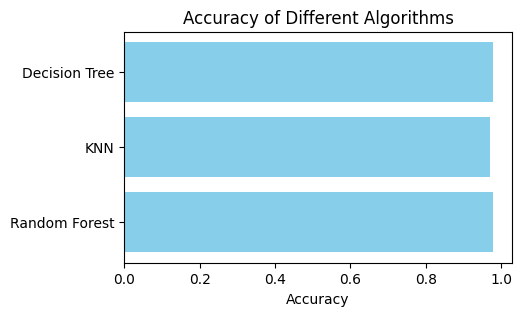

In [106]:

classifiers = {
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
}

accuracies = []
labels = []

for label, clf in classifiers.items():
        clf.fit(X_train_encoded, y_clothes_train_encoded)
        y_pred = clf.predict(X_test_encoded)
        accuracy = accuracy_score(y_clothes_test_encoded, y_pred)
        accuracies.append(accuracy)
        labels.append(label)
   

#Check accuracy plot
plt.figure(figsize=(5, 3))
plt.barh(labels, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Algorithms') 
plt.show()


#### Here we can KNN give best accuracy ,so that we use next prediction using KNN

In [107]:

# Define features and target variables
X = df[['Gender', 'Age', 'Skin Color','Occasion','Fabric']].copy()  
y_clothes = df['Comfortable Clothes']
y_color = df[['Punjabi Color', 'Shirt Color', 'Saree Color', 'Kamiz Color']]

label_encoder_input = LabelEncoder()
X['Gender'] = label_encoder_input.fit_transform(X['Gender'])

X['Age'] = pd.to_numeric(X['Age'], errors='coerce')

age_bins = [0, 22, 40, 55, float('inf')]
age_labels = ['12-22', '23-40', '41-55', '55+']

X['Age'] = pd.cut(X['Age'], bins=age_bins, labels=age_labels, right=False)

label_encoder_age = LabelEncoder()
X['Age'] = label_encoder_age.fit_transform(X['Age'])

label_encoder_skin_color = LabelEncoder()
X['Skin Color'] = label_encoder_skin_color.fit_transform(X['Skin Color'])

label_encoder_Occasion = LabelEncoder()
X['Occasion'] = label_encoder_Occasion.fit_transform(X['Occasion'])

label_encoder_Fabric = LabelEncoder()
X['Fabric'] = label_encoder_Fabric.fit_transform(X['Fabric'])

label_encoder_clothes = LabelEncoder()
y_clothes_encoded = label_encoder_clothes.fit_transform(y_clothes)

X_train_clothes, X_test_clothes, y_clothes_train, y_clothes_test = train_test_split(X, y_clothes_encoded, test_size=0.2, random_state=42)

knn_classifier_clothes = KNeighborsClassifier()
knn_classifier_clothes.fit(X_train_clothes, y_clothes_train)


KNeighborsClassifier()

In [74]:
# User input for prediction 
user_input = {
    'Gender': 'Female',  
    'Age': '12-23',  
    'Skin Color': 'Brown',
    'Occasion': 'Special Event',  
    'Fabric': 'Gorgeous Types'
}


In [75]:
def Punjabi_Color(user_input, df):

    Punjabi_df = df[df['Comfortable Clothes'] == 'Punjabi']
    X = Punjabi_df[['Gender', 'Age', 'Skin Color','Occasion','Fabric']]
    y_color = Punjabi_df['Punjabi Color']

    label_encoders = {}
    for column in ['Gender', 'Age', 'Skin Color','Occasion','Fabric']:
        label_encoders[column] = LabelEncoder()
        X[column] = label_encoders[column].fit_transform(X[column])

    label_encoder_color = LabelEncoder()
    y_color_encoded = label_encoder_color.fit_transform(y_color)

    knn_classifier_color = KNeighborsClassifier()
    knn_classifier_color.fit(X, y_color_encoded)

    input_df = pd.DataFrame(user_input, index=[0])

    for column in ['Gender', 'Age', 'Skin Color','Occasion','Fabric']:
        input_df[column] = label_encoders[column].transform([user_input[column]])

    color_prediction = knn_classifier_color.predict(input_df)

    predicted_color = label_encoder_color.inverse_transform(color_prediction)[0]

    print("Predicted Punjabi Color:", predicted_color)




In [76]:
def Shirt_Color(user_input, df):

        Shirt_df = df[df['Comfortable Clothes'] == 'Shirt']
        X = Shirt_df[['Gender', 'Age', 'Skin Color','Occasion','Fabric']]
        y_color = Shirt_df['Shirt Color']

        label_encoders = {}
        for column in ['Gender', 'Age', 'Skin Color','Occasion','Fabric']:
            label_encoders[column] = LabelEncoder()
            X[column] = label_encoders[column].fit_transform(X[column])

        label_encoder_color = LabelEncoder()
        y_color_encoded = label_encoder_color.fit_transform(y_color)

        knn_classifier_color = KNeighborsClassifier()
        knn_classifier_color.fit(X, y_color_encoded)

        input_df = pd.DataFrame(user_input, index=[0])

        for column in ['Gender', 'Age', 'Skin Color','Occasion','Fabric']:
            input_df[column] = label_encoders[column].transform([user_input[column]])

        color_prediction = knn_classifier_color.predict(input_df)
        predicted_color = label_encoder_color.inverse_transform(color_prediction)[0]

        print("Predicted Shirt Color:", predicted_color)


In [77]:
def Kamiz_Color(user_input, df):

        kamiz_df = df[df['Comfortable Clothes'] == 'Salwar Kamiz']
        X = kamiz_df[['Gender', 'Age', 'Skin Color','Occasion','Fabric']]
        y_color = kamiz_df['Kamiz Color']

        label_encoders = {}
        for column in ['Gender', 'Age', 'Skin Color','Occasion','Fabric']:
            label_encoders[column] = LabelEncoder()
            X[column] = label_encoders[column].fit_transform(X[column])

        label_encoder_color = LabelEncoder()
        y_color_encoded = label_encoder_color.fit_transform(y_color)

        knn_classifier_color = KNeighborsClassifier()
        knn_classifier_color.fit(X, y_color_encoded)
        input_df = pd.DataFrame(user_input, index=[0])

        for column in ['Gender', 'Age', 'Skin Color','Occasion','Fabric']:
            input_df[column] = label_encoders[column].transform([user_input[column]])

        color_prediction = knn_classifier_color.predict(input_df)

        predicted_color = label_encoder_color.inverse_transform(color_prediction)[0]

        print("Predicted Salwar Kamiz Color:", predicted_color)


In [78]:
def Saree_Color(user_input, df):

        saree_df = df[df['Comfortable Clothes'] == 'Saree']
        X = saree_df[['Gender', 'Age', 'Skin Color','Occasion','Fabric']]
        y_color = saree_df['Saree Color']

        label_encoders = {}
        for column in ['Gender', 'Age', 'Skin Color','Occasion','Fabric']:
            label_encoders[column] = LabelEncoder()
            X[column] = label_encoders[column].fit_transform(X[column])
        label_encoder_color = LabelEncoder()
        y_color_encoded = label_encoder_color.fit_transform(y_color)

        knn_classifier_color = KNeighborsClassifier()
        knn_classifier_color.fit(X, y_color_encoded)
        input_df = pd.DataFrame(user_input, index=[0])

        for column in ['Gender', 'Age', 'Skin Color','Occasion','Fabric']:
            input_df[column] = label_encoders[column].transform([user_input[column]])

        color_prediction = knn_classifier_color.predict(input_df)
        predicted_color = label_encoder_color.inverse_transform(color_prediction)[0]

        print("Predicted Saree Color:", predicted_color)


In [79]:
# Predict comfortable clothes

X = df[['Gender', 'Age', 'Skin Color','Occasion','Fabric']]
y_clothes = df['Comfortable Clothes']

label_encoders = {}
for column in ['Gender', 'Age', 'Skin Color','Occasion','Fabric']:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

label_encoder_clothes = LabelEncoder()
y_clothes_encoded = label_encoder_clothes.fit_transform(y_clothes)

knn_classifier_clothes = KNeighborsClassifier()
knn_classifier_clothes.fit(X, y_clothes_encoded)

input_df = pd.DataFrame(user_input, index=[0])

for column in ['Gender', 'Age', 'Skin Color','Occasion','Fabric']:
    input_df[column] = label_encoders[column].transform([user_input[column]])


clothes_prediction = knn_classifier_clothes.predict(input_df)
predicted_cloth = label_encoder_clothes.inverse_transform(clothes_prediction)[0]


C:\Users\DCL\AppData\Local\Temp\ipykernel_16200\4188948873.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoders[column].fit_transform(X[column])
C:\Users\DCL\AppData\Local\Temp\ipykernel_16200\4188948873.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoders[column].fit_transform(X[column])
C:\Users\DCL\AppData\Local\Temp\ipykernel_16200\4188948873.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [80]:
print("Predicted Comfortable Clothes:", predicted_cloth)

# Call different functions based on the predicted comfortable clothes
if predicted_cloth == 'Panjabi':
    predicted_color = Punjabi_Color(user_input, df)
elif predicted_cloth == 'Shirt':
    predicted_color = Shirt_Color(user_input, df)
elif predicted_cloth == 'Saree':
    predicted_color = Saree_Color(user_input, df)
elif predicted_cloth == 'Salwar Kamiz':
    predicted_color = Kamiz_Color(user_input, df)
else:
    predicted_color = "No color prediction function available for the predicted comfortable clothes."



Predicted Comfortable Clothes: Saree
Predicted Saree Color: White


C:\Users\DCL\AppData\Local\Temp\ipykernel_16200\2059358448.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoders[column].fit_transform(X[column])
C:\Users\DCL\AppData\Local\Temp\ipykernel_16200\2059358448.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoders[column].fit_transform(X[column])
C:\Users\DCL\AppData\Local\Temp\ipykernel_16200\2059358448.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 